### Aim:

Perform sentiment analysis on the news headlines.

In [1]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
import re
import string

In [2]:
#read csv file
data = pd.read_csv('data/Eluvio_DS_Challenge.csv')
data[:10]

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews
5,1201287889,2008-01-25,15,0,Hay presto! Farmer unveils the illegal mock-...,False,Armagedonovich,worldnews
6,1201289438,2008-01-25,5,0,"Strikes, Protests and Gridlock at the Poland-U...",False,Clythos,worldnews
7,1201536662,2008-01-28,0,0,The U.N. Mismanagement Program,False,Moldavite,worldnews
8,1201558396,2008-01-28,4,0,Nicolas Sarkozy threatens to sue Ryanair,False,Moldavite,worldnews
9,1201635869,2008-01-29,3,0,US plans for missile shields in Polish town me...,False,JoeyRamone63,worldnews


In [3]:
#create the data frame
dataDF = pd.DataFrame(data)
dataDF

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews
5,1201287889,2008-01-25,15,0,Hay presto! Farmer unveils the illegal mock-...,False,Armagedonovich,worldnews
6,1201289438,2008-01-25,5,0,"Strikes, Protests and Gridlock at the Poland-U...",False,Clythos,worldnews
7,1201536662,2008-01-28,0,0,The U.N. Mismanagement Program,False,Moldavite,worldnews
8,1201558396,2008-01-28,4,0,Nicolas Sarkozy threatens to sue Ryanair,False,Moldavite,worldnews
9,1201635869,2008-01-29,3,0,US plans for missile shields in Polish town me...,False,JoeyRamone63,worldnews


### EDA

Let's check the categories of data provided to us.

In [4]:
categories = dataDF.groupby('category').size()
categories

category
worldnews    509236
dtype: int64

This means that the entire dataset consists of world news.

Before starting with the sentiment analysis, we need to classify the titles as positive, negative and neutral.

In [5]:
#create a new data frame with just headlines

headlinesDF = dataDF['title']
headlinesDF = pd.DataFrame(headlinesDF)
headlinesDF = headlinesDF.rename(columns={'title': 'headlines'})
headlinesDF

,headlines
0,Scores killed in Pakistan clashes
1,Japan resumes refuelling mission
2,US presses Egypt on Gaza border
3,Jump-start economy: Give health care to all
4,Council of Europe bashes EU&UN terror blacklist
5,Hay presto! Farmer unveils the illegal mock-...
6,"Strikes, Protests and Gridlock at the Poland-U..."
7,The U.N. Mismanagement Program
8,Nicolas Sarkozy threatens to sue Ryanair
9,US plans for missile shields in Polish town me...


### Data Cleaning

Before we head to modelling our data, we need to clean it. We will correct things like punctuation, remove html links etc.

In [6]:
headlinesDF['headlines'].str.find('http')

0        -1
1        -1
2        -1
3        -1
4        -1
5        -1
6        -1
7        -1
8        -1
9        -1
10       -1
11       -1
12       -1
13       -1
14       -1
15       -1
16       -1
17       -1
18       -1
19       -1
20       -1
21       -1
22       -1
23       -1
24       -1
25       -1
26       -1
27       -1
28       -1
29       -1
         ..
509206   -1
509207   -1
509208   -1
509209   -1
509210   -1
509211   -1
509212   -1
509213   -1
509214   -1
509215   -1
509216   -1
509217   -1
509218   -1
509219   -1
509220   -1
509221   -1
509222   -1
509223   -1
509224   -1
509225   -1
509226   -1
509227   -1
509228   -1
509229   -1
509230   -1
509231   -1
509232   -1
509233   -1
509234   -1
509235   -1
Name: headlines, Length: 509236, dtype: int64

As we can see, there aren't any url associated with the headlines. Therefore, there is no need to remove it from the headlines. However, we can remove it just to be safe.

In [7]:
#remove url
def removeURL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [8]:
headlinesDF['headlines']=headlinesDF['headlines'].apply(lambda x : removeURL(x))
headlinesDF['headlines'].str.find('http')

0        -1
1        -1
2        -1
3        -1
4        -1
5        -1
6        -1
7        -1
8        -1
9        -1
10       -1
11       -1
12       -1
13       -1
14       -1
15       -1
16       -1
17       -1
18       -1
19       -1
20       -1
21       -1
22       -1
23       -1
24       -1
25       -1
26       -1
27       -1
28       -1
29       -1
         ..
509206   -1
509207   -1
509208   -1
509209   -1
509210   -1
509211   -1
509212   -1
509213   -1
509214   -1
509215   -1
509216   -1
509217   -1
509218   -1
509219   -1
509220   -1
509221   -1
509222   -1
509223   -1
509224   -1
509225   -1
509226   -1
509227   -1
509228   -1
509229   -1
509230   -1
509231   -1
509232   -1
509233   -1
509234   -1
509235   -1
Name: headlines, Length: 509236, dtype: int64

In [9]:
#remove html tags
def removeHTML(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'',text)

In [10]:
headlinesDF['headlines']=headlinesDF['headlines'].apply(lambda x : removeHTML(x))
headlinesDF['headlines'].str.find('http')

0        -1
1        -1
2        -1
3        -1
4        -1
5        -1
6        -1
7        -1
8        -1
9        -1
10       -1
11       -1
12       -1
13       -1
14       -1
15       -1
16       -1
17       -1
18       -1
19       -1
20       -1
21       -1
22       -1
23       -1
24       -1
25       -1
26       -1
27       -1
28       -1
29       -1
         ..
509206   -1
509207   -1
509208   -1
509209   -1
509210   -1
509211   -1
509212   -1
509213   -1
509214   -1
509215   -1
509216   -1
509217   -1
509218   -1
509219   -1
509220   -1
509221   -1
509222   -1
509223   -1
509224   -1
509225   -1
509226   -1
509227   -1
509228   -1
509229   -1
509230   -1
509231   -1
509232   -1
509233   -1
509234   -1
509235   -1
Name: headlines, Length: 509236, dtype: int64

In [11]:
#remove punctuation
def removePunctuation(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

In [12]:
headlinesDF['headlines']=headlinesDF['headlines'].apply(lambda x : removePunctuation(x))
headlinesDF['headlines'].str.find(':')

0        -1
1        -1
2        -1
3        -1
4        -1
5        -1
6        -1
7        -1
8        -1
9        -1
10       -1
11       -1
12       -1
13       -1
14       -1
15       -1
16       -1
17       -1
18       -1
19       -1
20       -1
21       -1
22       -1
23       -1
24       -1
25       -1
26       -1
27       -1
28       -1
29       -1
         ..
509206   -1
509207   -1
509208   -1
509209   -1
509210   -1
509211   -1
509212   -1
509213   -1
509214   -1
509215   -1
509216   -1
509217   -1
509218   -1
509219   -1
509220   -1
509221   -1
509222   -1
509223   -1
509224   -1
509225   -1
509226   -1
509227   -1
509228   -1
509229   -1
509230   -1
509231   -1
509232   -1
509233   -1
509234   -1
509235   -1
Name: headlines, Length: 509236, dtype: int64

In [13]:
headlinesDF

,headlines
0,Scores killed in Pakistan clashes
1,Japan resumes refuelling mission
2,US presses Egypt on Gaza border
3,Jumpstart economy Give health care to all
4,Council of Europe bashes EUUN terror blacklist
5,Hay presto Farmer unveils the illegal mockTu...
6,Strikes Protests and Gridlock at the PolandUkr...
7,The UN Mismanagement Program
8,Nicolas Sarkozy threatens to sue Ryanair
9,US plans for missile shields in Polish town me...


In [25]:
### Polarity definition using TextBlob

In [14]:
# Importing TextBlob
from textblob import TextBlob

In [15]:
sentence = 'Scores killed in Pakistan clashes'
# Creating a textblob object and assigning the sentiment property
analysis = TextBlob(sentence).sentiment[0] #0 gives polarity, 1 gives subjectivity
print(analysis)

-0.2


In [16]:
# negative values indicate negative sentiments, positive values indicate positive sentiments
def sentimentAnalysis(row):
    analysis = TextBlob(row).sentiment.polarity
    return analysis

In [17]:
headlinesDF['polarity'] = headlinesDF["headlines"].apply(sentimentAnalysis)

In [18]:
headlinesDF

,headlines,polarity
0,Scores killed in Pakistan clashes,-0.200000
1,Japan resumes refuelling mission,0.000000
2,US presses Egypt on Gaza border,0.000000
3,Jumpstart economy Give health care to all,0.000000
4,Council of Europe bashes EUUN terror blacklist,0.000000
5,Hay presto Farmer unveils the illegal mockTu...,-0.450000
6,Strikes Protests and Gridlock at the PolandUkr...,0.000000
7,The UN Mismanagement Program,0.000000
8,Nicolas Sarkozy threatens to sue Ryanair,0.000000
9,US plans for missile shields in Polish town me...,0.000000


In [19]:
#let's define the values for polarity as follows: 
# 0  : neutral
# -1 : negative
# 1 : positive

def polarChange(row):
    polar = 0
    
    if row < 0:
        polar = -1
    if row > 0:
        polar = 1
    if row == 0:
        polar = 0
    
    return polar


In [20]:
headlinesDF['polarVal'] = headlinesDF["polarity"].apply(polarChange)
headlinesDF

,headlines,polarity,polarVal
0,Scores killed in Pakistan clashes,-0.200000,-1
1,Japan resumes refuelling mission,0.000000,0
2,US presses Egypt on Gaza border,0.000000,0
3,Jumpstart economy Give health care to all,0.000000,0
4,Council of Europe bashes EUUN terror blacklist,0.000000,0
5,Hay presto Farmer unveils the illegal mockTu...,-0.450000,-1
6,Strikes Protests and Gridlock at the PolandUkr...,0.000000,0
7,The UN Mismanagement Program,0.000000,0
8,Nicolas Sarkozy threatens to sue Ryanair,0.000000,0
9,US plans for missile shields in Polish town me...,0.000000,0


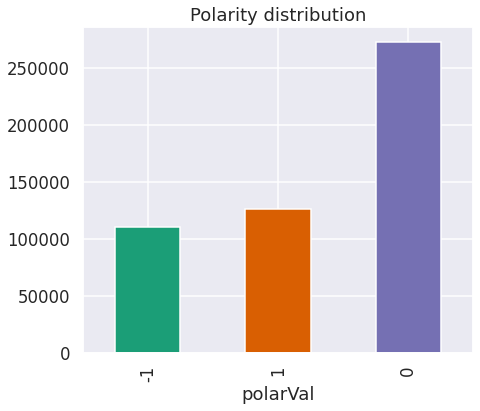

In [21]:
#Now that we have the simplified polairty, let's check the polarity distribution
plot = headlinesDF.groupby('polarVal').count()['polarity'].sort_values().plot(kind= 'bar', title = 'Polarity distribution', figsize =(7,6))
plt.show()

We have more neutral headings in comparison to positive and negative headings in this dataset. This may lead to biased learning. Therefore, let's sample the data to equalize the class size. However, before jumping into class equalization, we need to convert the text to numbers without losing information. 

In [27]:
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [28]:
#assign polarVal as y

y = headlinesDF['polarVal']
yDF = pd.DataFrame(y)
yDF = yDF.rename(columns={'polarVal': 'y'})
yDF

,y
0,-1
1,0
2,0
3,0
4,0
5,-1
6,0
7,0
8,0
9,0


In [29]:
#assign headlines as X

X = headlinesDF['headlines']
xDF = pd.DataFrame(X)
xDF

,headlines
0,Scores killed in Pakistan clashes
1,Japan resumes refuelling mission
2,US presses Egypt on Gaza border
3,Jumpstart economy Give health care to all
4,Council of Europe bashes EUUN terror blacklist
5,Hay presto Farmer unveils the illegal mockTu...
6,Strikes Protests and Gridlock at the PolandUkr...
7,The UN Mismanagement Program
8,Nicolas Sarkozy threatens to sue Ryanair
9,US plans for missile shields in Polish town me...


In [35]:
#split X and y into test and train datasets
X_train, X_test, y_train, y_test = train_test_split(xDF, yDF, test_size=0.2)

In [ ]:
#implement CountVectorizer and TfidfVectorizer on test and train datasets

cv = CountVectorizer()
tv = , TfidfVectorizer